# Principal Component Analysis (PCA) with Python

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

## Data Import: quarries dataset

In [3]:
data = pd.read_csv('C:/Users/Eugenio_Py/Desktop/Notebooks/datasets/iris.csv', sep=";", header=0, index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, s_1 to s_150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
ID,,,,,
s_1,5.1,3.5,1.4,0.2,Setosa
s_2,4.9,3.0,1.4,0.2,Setosa
s_3,4.7,3.2,1.3,0.2,Setosa
s_4,4.6,3.1,1.5,0.2,Setosa
s_5,5.0,3.6,1.4,0.2,Setosa


In [6]:
# Checking the missing values
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

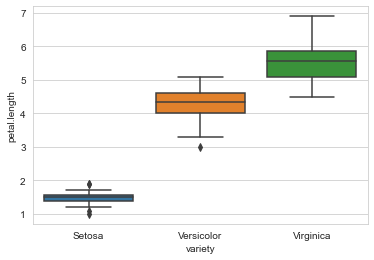

In [7]:
# Boxplot using seaborn
sns.set_style("whitegrid")  
sns.boxplot(x = 'variety', y = 'petal.length', data = data);

In [11]:
# select only numerical attributes
X = data.iloc[:, 0:4]
X

,sepal.length,sepal.width,petal.length,petal.width
ID,,,,
s_1,5.1,3.5,1.4,0.2
s_2,4.9,3.0,1.4,0.2
s_3,4.7,3.2,1.3,0.2
s_4,4.6,3.1,1.5,0.2
s_5,5.0,3.6,1.4,0.2
...,...,...,...,...
s_146,6.7,3.0,5.2,2.3
s_147,6.3,2.5,5.0,1.9
s_148,6.5,3.0,5.2,2.0


In [12]:
# autoscale the data
from sklearn.preprocessing import scale
X = scale(X.values)

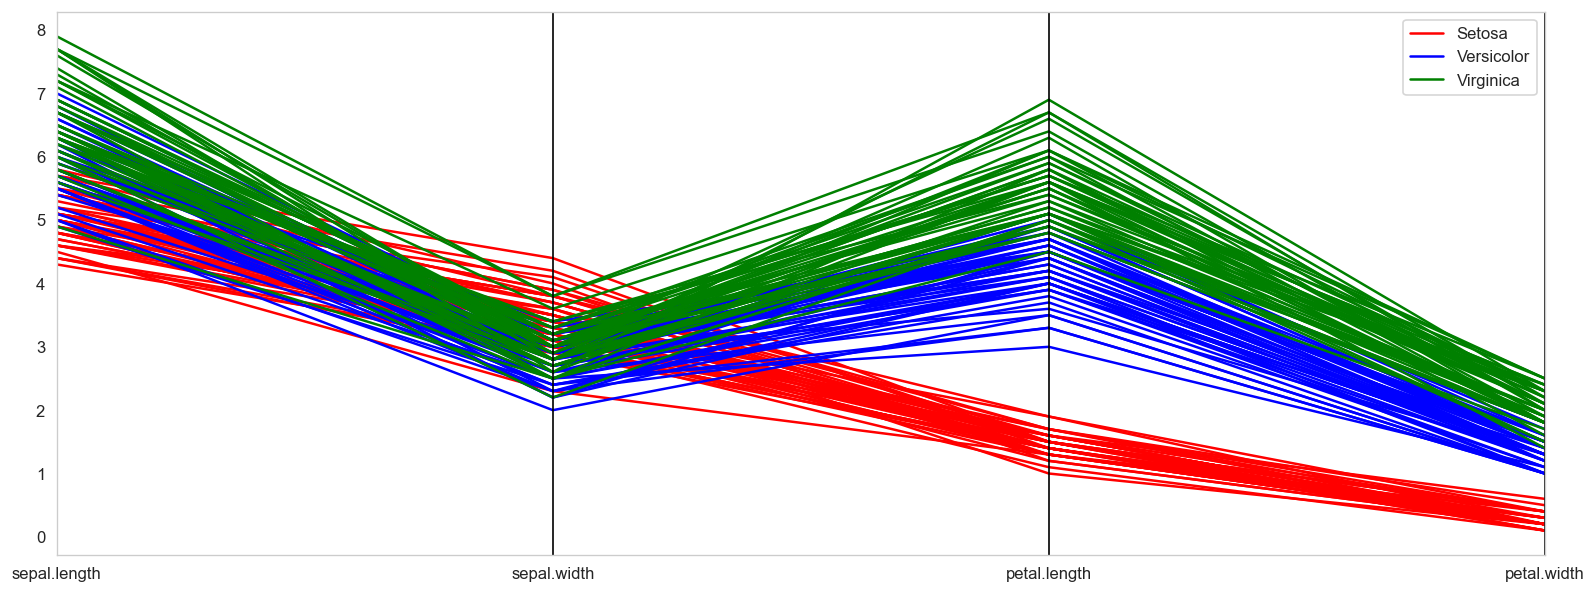

In [13]:
# This is called parallel coordinates plot
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=120)
fig = pd.plotting.parallel_coordinates( data, 'variety', color=('red', 'blue','green'));
fig;

In [16]:
# Prepare the dataset for autoscaled data
data_autosc = pd.DataFrame(X)
data_autosc.columns = data.columns[0:4]
data_autosc.index = data.index
data_autosc.head()
data_autosc['variety'] = data.variety
data_autosc.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
ID,,,,,
s_1,-0.900681,1.019004,-1.340227,-1.315444,Setosa
s_2,-1.143017,-0.131979,-1.340227,-1.315444,Setosa
s_3,-1.385353,0.328414,-1.397064,-1.315444,Setosa
s_4,-1.506521,0.098217,-1.283389,-1.315444,Setosa
s_5,-1.021849,1.249201,-1.340227,-1.315444,Setosa


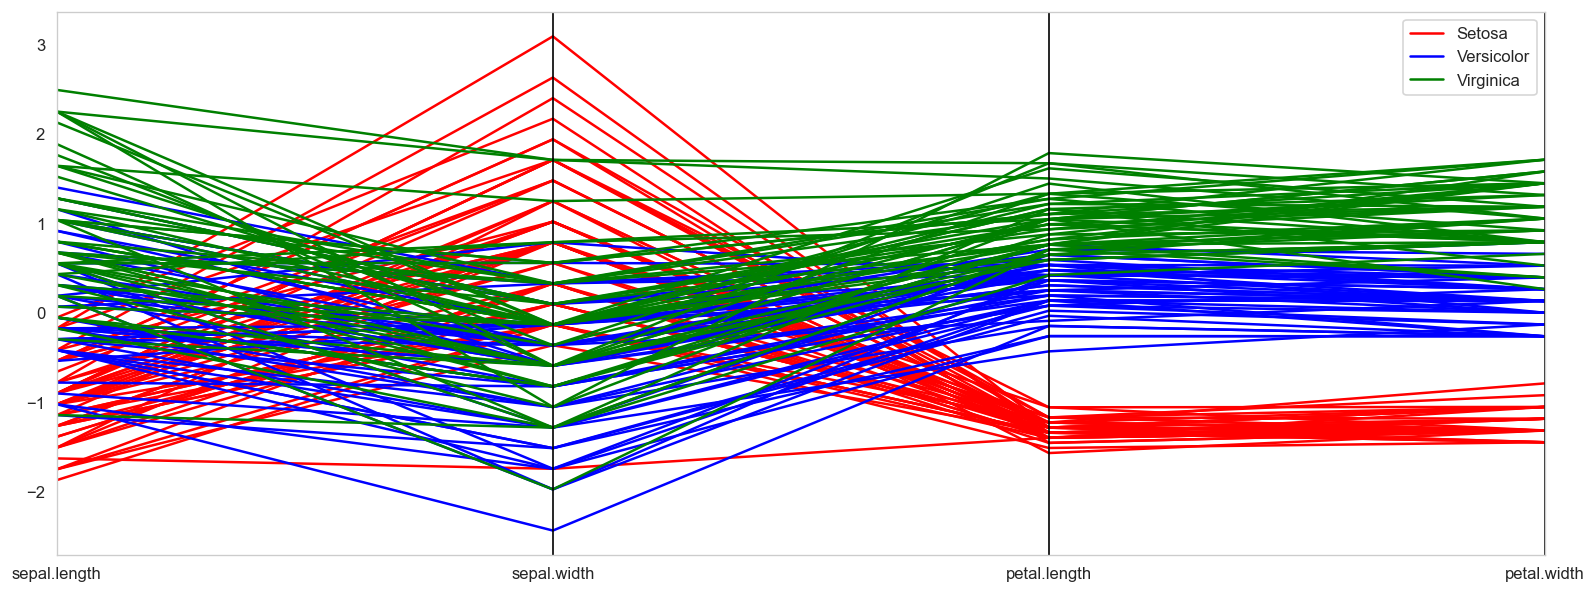

In [17]:
# This is called parallel coordinates plot
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=120)
fig = pd.plotting.parallel_coordinates(data_autosc, 'variety', color=('red', 'blue', 'green'));
fig;

In [18]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
pca

PCA(n_components=4)

In [19]:
Principal_components=pca.fit_transform(X)

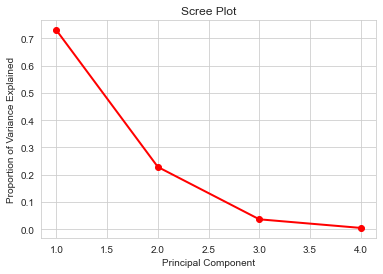

In [22]:
# Scree plot
import matplotlib
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [23]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
   
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative Prop. Variance Explained:  [0.72962445 0.95813207 0.99482129 1.        ]


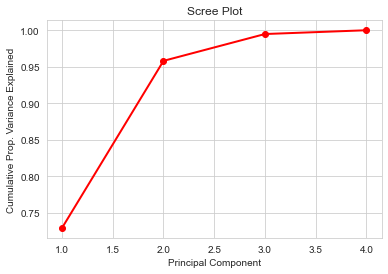

In [24]:
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.show()

In [25]:
print(pca.explained_variance_) 

[2.93808505 0.9201649  0.14774182 0.02085386]


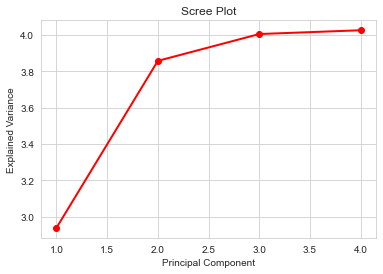

In [26]:
plt.plot(PC_values, np.cumsum(pca.explained_variance_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [39]:
pca = decomposition.PCA(n_components=3)
Principal_components=pca.fit_transform(X)
scores = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2','PC3'])
scores.index = data.index
scores = pd.concat([scores, data.variety], axis = 1)
print(scores)

            PC1       PC2       PC3    variety
ID                                            
s_1   -2.264703  0.480027 -0.127706     Setosa
s_2   -2.080961 -0.674134 -0.234609     Setosa
s_3   -2.364229 -0.341908  0.044201     Setosa
s_4   -2.299384 -0.597395  0.091290     Setosa
s_5   -2.389842  0.646835  0.015738     Setosa
...         ...       ...       ...        ...
s_146  1.870503  0.386966  0.256274  Virginica
s_147  1.564580 -0.896687 -0.026371  Virginica
s_148  1.521170  0.269069  0.180178  Virginica
s_149  1.372788  1.011254  0.933395  Virginica
s_150  0.960656 -0.024332  0.528249  Virginica

[150 rows x 4 columns]


In [43]:
# Loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=data.columns[0:4])
loadings["Attributes"] = loadings.index
loadings

,PC1,PC2,PC3,Attributes
sepal.length,0.521066,0.377418,-0.719566,sepal.length
sepal.width,-0.269347,0.923296,0.244382,sepal.width
petal.length,0.580413,0.024492,0.142126,petal.length
petal.width,0.564857,0.066942,0.634273,petal.width


In [44]:
#Scores plot
import plotly.express as px
fig = px.scatter(scores, x="PC1", y="PC2", color="variety", hover_data=['variety'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [45]:
fig = px.scatter(loadings, x="PC1", y="PC2", text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

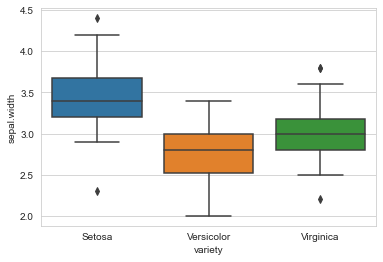

In [46]:
# Boxplot using seaborn
sns.set_style("whitegrid")  
sns.boxplot(x = 'variety', y = 'sepal.width', data = data);

## Hotelling's T2 vs Q-residuals

In [49]:
# Get PCA scores
T = scores.iloc[:,0:3]
# Get PCA loadings
P = loadings.iloc[:,0:3]
# Calculate error array
Err = X - np.dot(T,P.T)
# Calculate Q-residuals (sum over the rows of the error array)
Q = np.sum(Err**2, axis=1)
# Calculate Hotelling's T-squared (note that data are normalised by default)
Tsq = np.sum((T/np.std(T, axis=0))**2, axis=1)

# set the confidence level
conf = 0.95
ncomp = 3
 
from scipy.stats import f

# Calculate confidence level for T-squared from the ppf of the F distribution
Tsq_conf =  f.ppf(q=conf, dfn=ncomp, \
            dfd=X.shape[0])*ncomp*(X.shape[0]-1)/(X.shape[0]-ncomp)
# Estimate the confidence level for the Q-residuals
i = np.max(Q)+1
while 1-np.sum(Q>i)/np.sum(Q>0) > conf:
    i -= 1
Q_conf = i

# Create a dataframe using only T2 and Q-residuals
hot_q_data = {'T2': Tsq, 'Qres': Q, 'variety': data.variety}  
hot_q_data = pd.DataFrame(hot_q_data, index = data.index)
hot_q_data

,T2,Qres,variety
ID,,,
s_1,2.120596,0.000584,Setosa
s_2,2.356028,0.010610,Setosa
s_3,2.056434,0.000805,Setosa
s_4,2.258840,0.004350,Setosa
s_5,2.416383,0.001290,Setosa
...,...,...,...
s_146,1.810174,0.151521,Virginica
s_147,1.723169,0.048485,Virginica
s_148,1.093279,0.014202,Virginica


In [52]:
# Plot the Hotelling T2 vs Q-residuals plot
fig = px.scatter(hot_q_data, x="T2", y="Qres", hover_data={'Sample': (hot_q_data.index)})#, color = "Class")
fig.add_hline(y=abs(Q_conf),line_dash="dot", line_color='Red')
fig.add_vline(x=Tsq_conf,line_dash="dot", line_color='Red')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text="Hotelling's T2 vs Q-residuals")
fig.show()